<a href="https://colab.research.google.com/github/sristi-01/ROUTE-CREATION-DEVIATION-WITH-BUFFER/blob/master/Route_deviation_and_creation_using_buffer_PIPRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

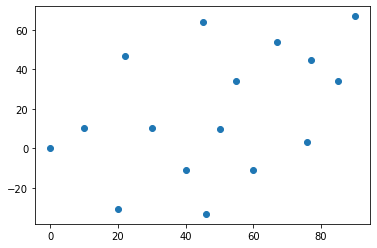

len 270 270
len 16 16
rsq 1 0.18450466529400178
rsq 2 0.2248414917699577
rsq 3 0.23709344724270343
rsq 4 0.2383920040877665
rsq 5 0.24867475978843268
rsq 6 0.26228656262015193
rsq 7 0.26913326610086485
rsq 8 0.272581816996577
rsq 9 0.27620825957323714
rsq 10 0.4341986625223747
rsq 11 0.5051028495702892
rsq 12 0.5052341613794755
rsq 13 0.5917696954560675
rsq 14 0.7384076731022973
rsq 15 0.9999967320207033
[-5.08249472e-17  3.70106993e-14 -1.22994130e-11  2.46970313e-09
 -3.34358651e-07  3.22420143e-05 -2.28015689e-03  1.19924038e-01
 -4.70396857e+00  1.36606060e+02 -2.88289180e+03  4.27218977e+04
 -4.18410653e+05  2.41020760e+06 -6.11098499e+06  4.68750000e-02]


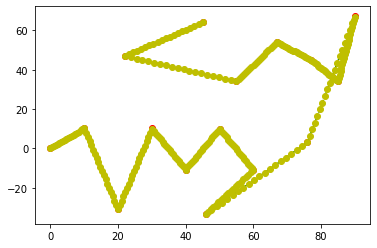

270 270
286 286
<class 'pandas.core.series.Series'>
New List [[0.0, 4.0], [0.069809625749134, 3.99939078062556], [0.13959798681000402, 3.99756330807638], [0.209343824971775, 3.9945181390182998], [0.27902589497650104, 3.9902562010393], [0.348622970990633, 3.9847787923669795], [0.41811385307061405, 3.97808758147309], [2.0, 3.46410161513776], [2.06015229964022, 3.4286692028084507], [2.11967705693282, 3.3921923846257003]]
[0.0, 4.0] True
[0.069809625749134, 3.99939078062556] True
[0.13959798681000402, 3.99756330807638] True
[0.209343824971775, 3.9945181390182998] True
[0.27902589497650104, 3.9902562010393] True
[0.348622970990633, 3.9847787923669795] True
[0.41811385307061405, 3.97808758147309] True
[2.0, 3.46410161513776] True
[2.06015229964022, 3.4286692028084507] True
[2.11967705693282, 3.3921923846257003] True
[0.0, -20.0] False
[0.0, 60.0] False
[80.0, -20.0] False
[20.0, 60.0] False
[20.0, 20.0] False
[40.0, 20.0] False
[60.0, 20.0] False
<class 'pandas.core.frame.DataFrame'>


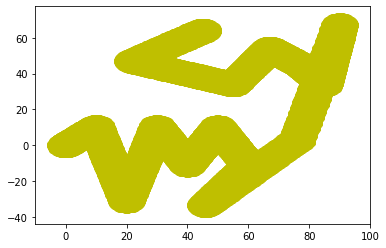

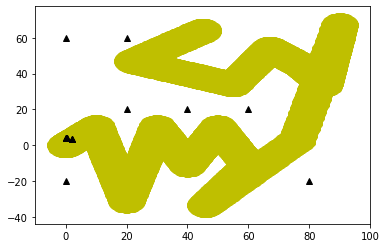

In [ ]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.cluster import MeanShift, estimate_bandwidth
import pandas as pd
import numpy as np
 
dfpx=pd.read_csv("//content//dfpx.csv")
x=dfpx['x']
y=dfpx['y']
#print("x =",x)
#print("y =",y)
plt.plot(x,y,'o')
plt.show()
 
#plt.plot(x,y,'y')
def intermediates(p1, p2, nb_points=8):
    """"Return a list of nb_points equally spaced points
    between p1 and p2"""
    # If we have 8 intermediate points, we have 8+1=9 spaces
    # between p1 and p2
    x_spacing = (p2[0] - p1[0]) / (nb_points + 1)
    #y_spacing = (p2[1] - p1[1]) / (nb_points + 1)
 
    return [p1[0] + i * x_spacing
            for i in range(1, nb_points+1)]
 
 
import numpy as np 
 
newx=[]
newy=[]
def betweenpoints(x,y,p1,p2):
        x1, x2 = x[p1], x[p2]
        y1, y2 = y[p1], y[p2]
        xiter = intermediates([x1],[x2],18)
        xitr= list(xiter)
        yiter = intermediates([y1],[y2],18)
        yitr=list(yiter)
        newx.extend(xitr)
        newy.extend(yitr)
        
n=(len(x)-1)       
for i in np.arange(0,n,1):
    betweenpoints(x,y,i,i+1)
 
#print("xitr",newx)
#print("yitr",newy)
print("len",len(newx),len(newy))
print("len",len(x),len(y))
 
for i in range(1,1000):  #range  may needs to change for converging into fit
    p=np.polyfit(x,y,i) #coefficient&intercepts
    #print("coeffient & intercepts for degree is p ",i, p)
    yfit=np.polyval(p,x)
    #print("yfit",i,yfit)
    yresid= y - yfit
    SSresid = np.sum(yresid**2)
    SStotal = len(y) * np.var(y)
    rsq = 1 - SSresid/SStotal
    print("rsq",i,rsq)
 
    if(rsq>.85 ):      #not come 1 0r .99 exactly everytime so greater than some rsq value which can ALSO CAN BE ELLIGIBLE
        degree = p
        print(p)
    
    else:
        continue
    break         
yp=  np.polyval(degree,x)
#print("fit value for making curve is yp", yp)
#print("given value for making curve is xp", x)
plt.plot(x,yp,'ro')
n=(len(x)-1)
def connectpoints(x,y,p1,p2):
        x1, x2 = x[p1], x[p2]
        y1, y2 = y[p1], y[p2]
        plt.plot([x1,x2],[y1,y2],'g--')
 
for i in np.arange(0,n,1):
    connectpoints(x,yp,i,i+1)  #plt.plot(x,np.polyval(p,x),'k--')
 
y=list(y)
x=list(x)
x.extend(newx)
y.extend(newy)
plt.plot(x,y,'yo')
plt.show()
 
#print("x",x)
#print("y",y)
 
 
print(len(newx),len(newy))
print(len(x),len(y))
n=(len(x))
 
df = pd.DataFrame(data={"Bx": x, "By": y})
df.to_csv("//content//BUFFER.csv", sep=',',index=False)
 
 
dfBx=pd.read_csv("//content//BUFFER.csv")
x11=dfBx['Bx']
y11=dfBx['By']
 
 
print(type(x11))
 
from shapely.geometry import Point,Polygon
from shapely import geometry
# create your points
 
chk = pd.read_csv("//content//pointinpoly (1).csv")
X = chk['x']  # print(x,y)
Y = chk['y']
XY = np.hstack((X[:, np.newaxis], Y[:, np.newaxis]))
newp = XY #ORIGINAL CHECKING POINTS
TRACED_PT=[]
for point in newp:
    #print(point)
    allpts=[]
    def create_points(x,y,p1):
        x = x[p1]
        y = y[p1]
        #print(type(x))
        x=float(x)
        y=float(y)
        #print(type(x))
        point_1 = geometry.Point(x, y)
        # create your circle buffer from one of the points
        distance = 5
        circle_buffer = point_1.buffer(distance)
        pts=list(circle_buffer.exterior.coords)
        poly=Polygon(pts)
 
        #print(list(circle_buffer.exterior.coords))
        allpts.extend(pts)
 
 
        #CHECK WHETHER EACH POINT INSIDE OR NOT
        ppoint = Point(point)  # print(point.within(circle_buffer))
        if ppoint.within(circle_buffer):
            #print('point  is within the distance buffer of point 1 = ', point)
            pointTR=list(point)
            TRACED_PT.extend([pointTR])
 
 
    n=(len(x11))
    for i in np.arange(0,n,1):
        create_points(x11,y11,i)
 
 
import itertools
num = TRACED_PT
new_num = list(num for num,_ in itertools.groupby(num))
print("New List", new_num)
 
chk = pd.read_csv("//content//pointinpoly (1).csv")
X = chk['x']  # print(x,y)
Y = chk['y']
XY = np.hstack((X[:, np.newaxis], Y[:, np.newaxis]))
newp = XY
for point in newp:
    point=list(point)
    #print(type(point))
    #print(type(new_num))
    if point in new_num:
            print(point,"True")
    else:
            print(point,"False")
 
 
 
ptsdf = pd.DataFrame(allpts)
print(type(ptsdf))
 
 
#ptsdf = pd.DataFrame(ptsdf={"PBx": x, "PBy": y})
 
ptsdf.columns = ['ptsx', 'ptsy']
ptsdf.to_csv("//content//aLL_BUFFER.csv", sep=',',index=False)
 
ptsdfBx =pd.read_csv("//content//aLL_BUFFER.csv")
x111=ptsdfBx['ptsx']
y111=ptsdfBx['ptsy']
plt.plot(x111,y111,'yo')
plt.show()
 
 
 
chk = pd.read_csv("//content//pointinpoly (1).csv")
X = chk['x']  # print(x,y)
Y = chk['y']
XY = np.hstack((X[:, np.newaxis], Y[:, np.newaxis]))
newp = XY
plt.plot(x111,y111,'yo')
plt.plot(newp[:, 0], newp[:, 1], '^k')
plt.show()
##############t#######

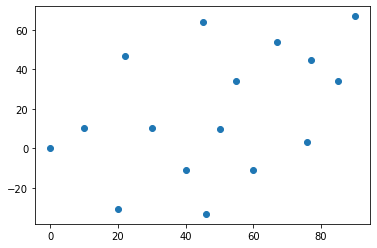

len 210 210
len 16 16


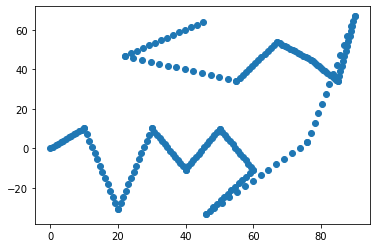

rsq 1 0.18450466529400178
rsq 2 0.2248414917699577
rsq 3 0.23709344724270343
rsq 4 0.2383920040877665
rsq 5 0.24867475978843268
rsq 6 0.26228656262015193
rsq 7 0.26913326610086485
rsq 8 0.272581816996577
rsq 9 0.27620825957323714
rsq 10 0.4341986625223747
rsq 11 0.5051028495702892
rsq 12 0.5052341613794755
rsq 13 0.5917696954560675
rsq 14 0.7384076731022973
rsq 15 0.9999967320207033
[-5.08249472e-17  3.70106993e-14 -1.22994130e-11  2.46970313e-09
 -3.34358651e-07  3.22420143e-05 -2.28015689e-03  1.19924038e-01
 -4.70396857e+00  1.36606060e+02 -2.88289180e+03  4.27218977e+04
 -4.18410653e+05  2.41020760e+06 -6.11098499e+06  4.68750000e-02]


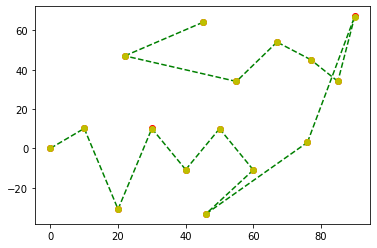

210 210
16 16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRUE  [0. 4.]
TRUE  [0.06980963 3.99939078]
TRUE  [0.13959799 3.99756331]
TRUE  [0.20934382 3.99451814]
TRUE  [0.27902589 3.9902562 ]
TRUE  [0.34862297 3.98477879]
TRUE  [0.41811385 3.97808758]
TRUE  [2.         3.46410162]
TRUE  [2.0601523 3.4286692]
TRUE  [2.11967706 3.39219238]
False [  0. -20.]
False [ 0. 60.]
False [ 80. -20.]
False [20. 60.]
False [20. 20.]
False [40. 20.]
False [60. 20.]


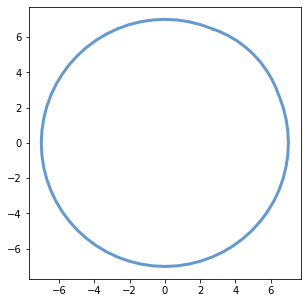

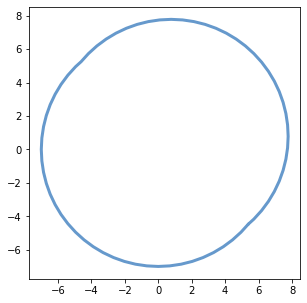

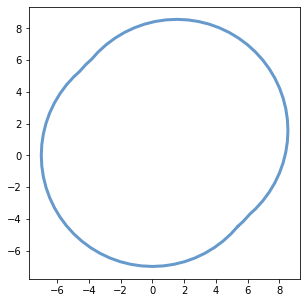

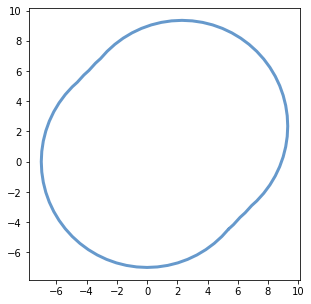

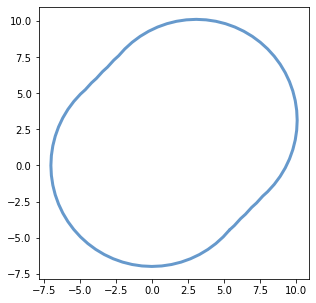

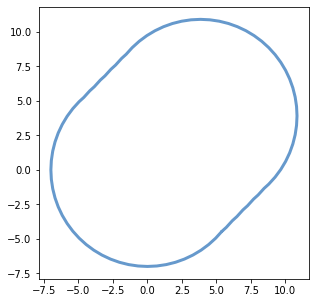

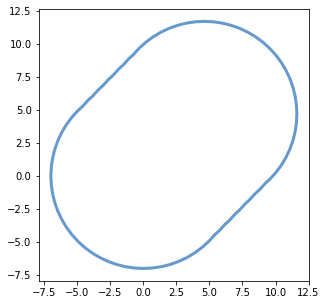

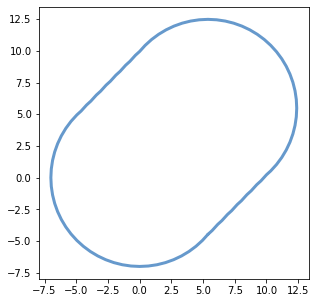

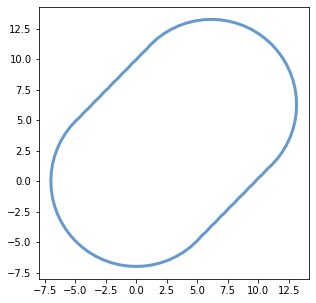

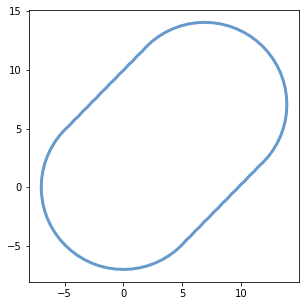

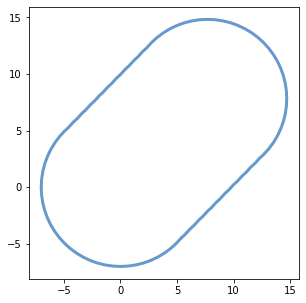

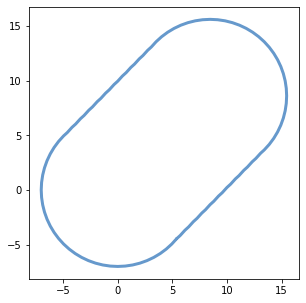

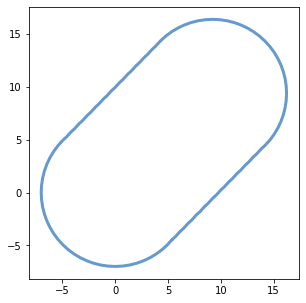

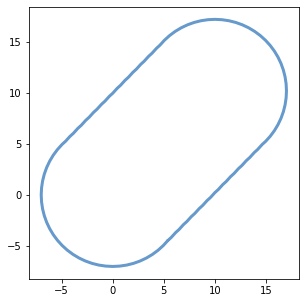

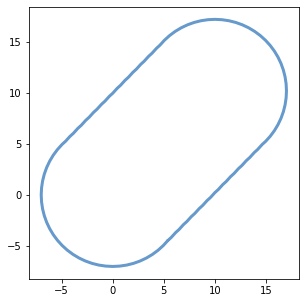

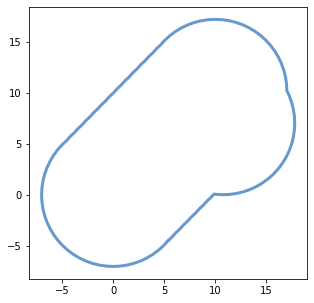

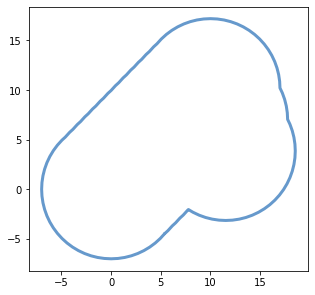

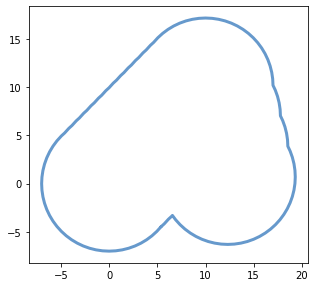

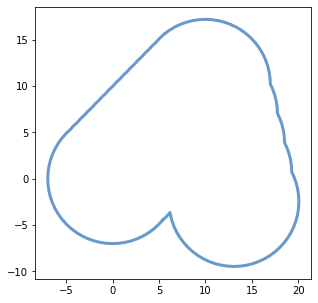

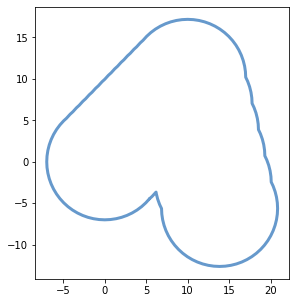

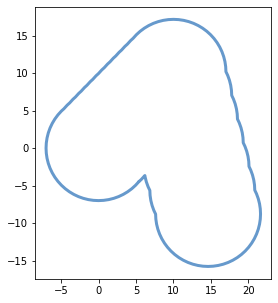

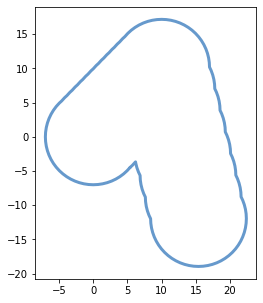

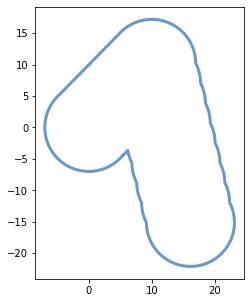

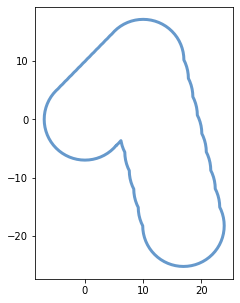

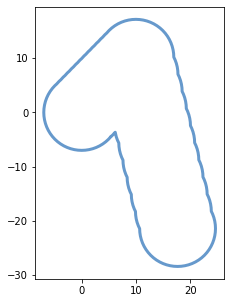

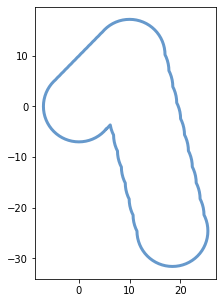

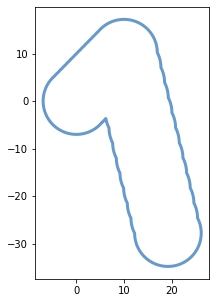

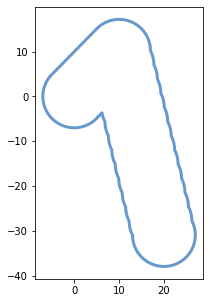

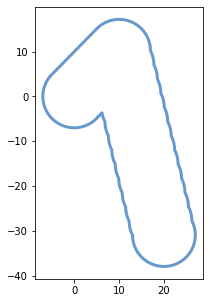

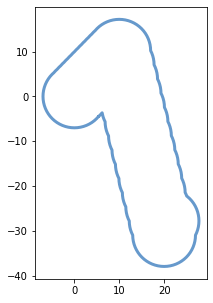

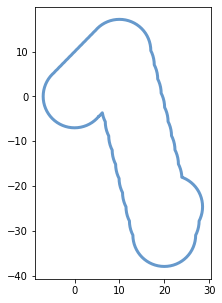

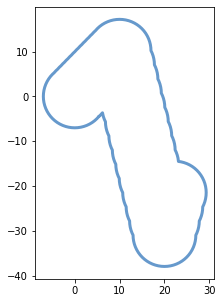

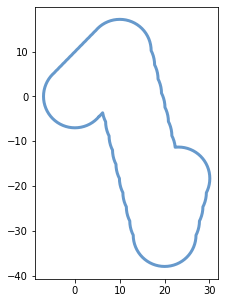

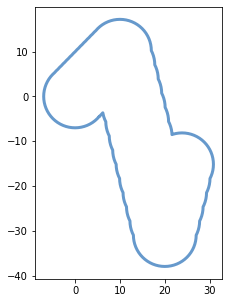

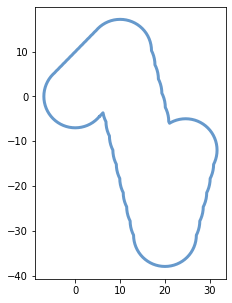

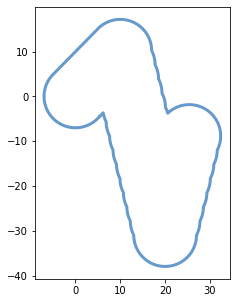

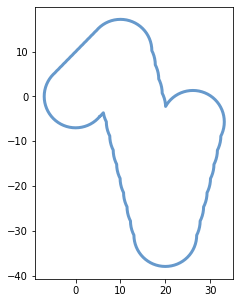

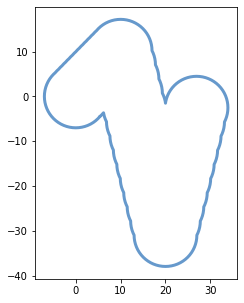

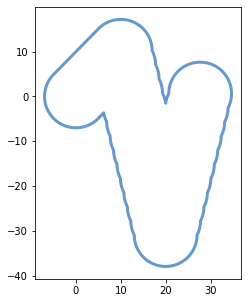

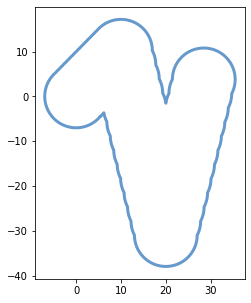

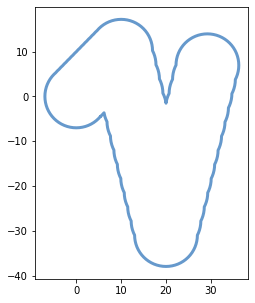

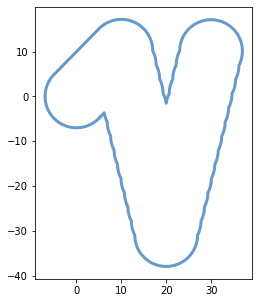

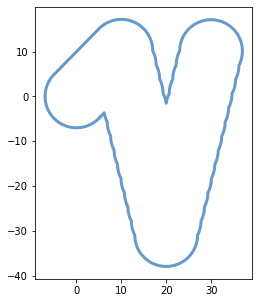

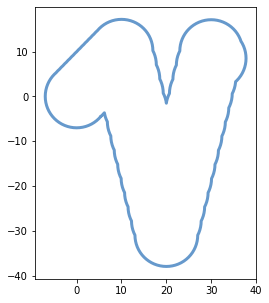

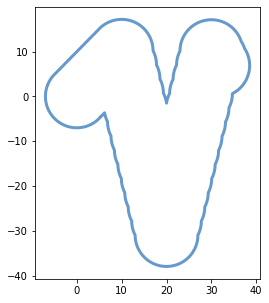

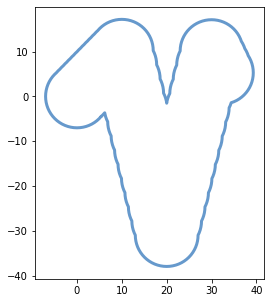

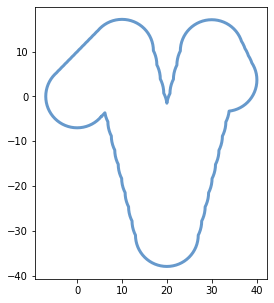

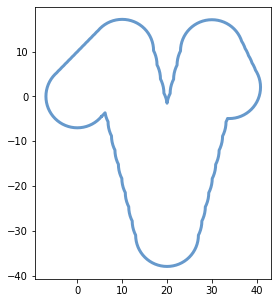

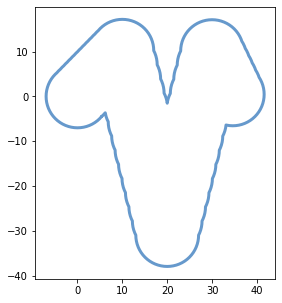

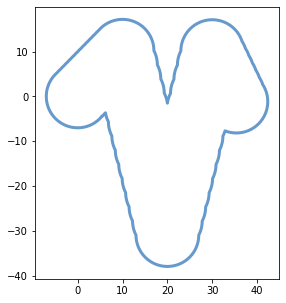

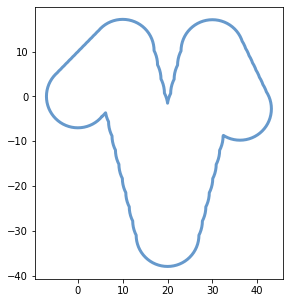

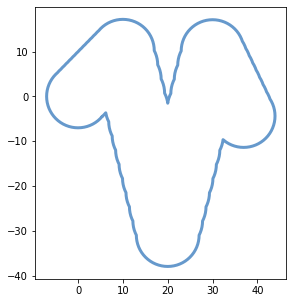

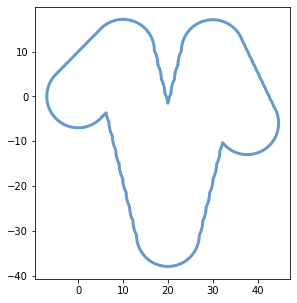

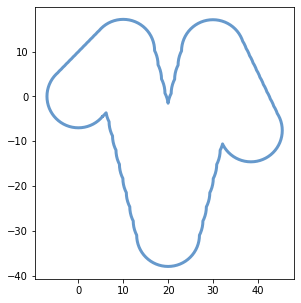

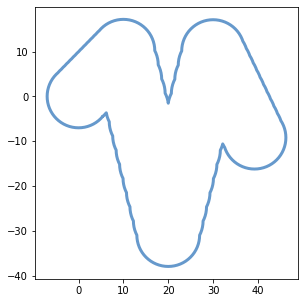

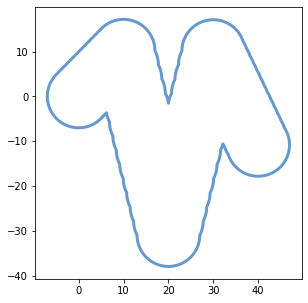

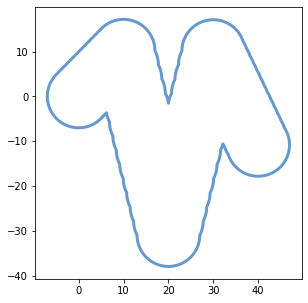

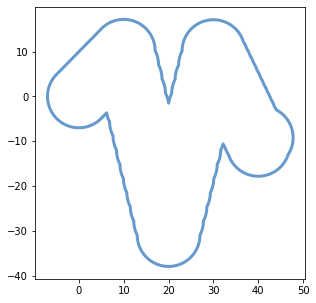

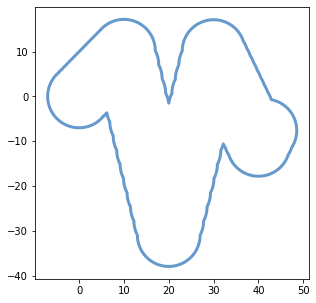

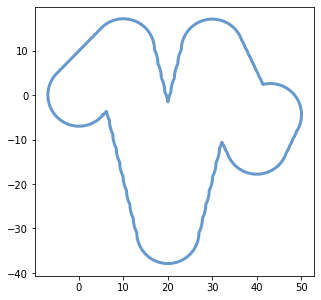

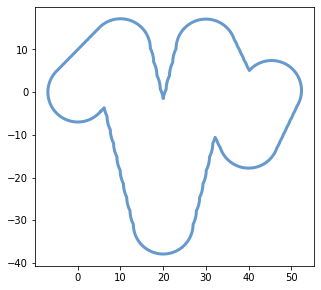

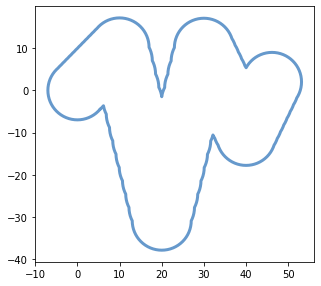

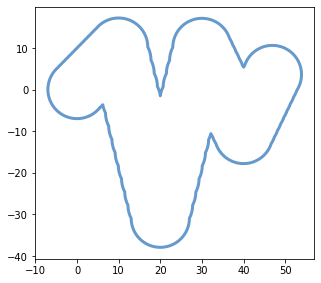

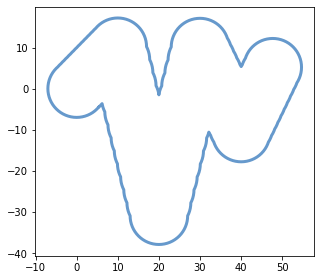

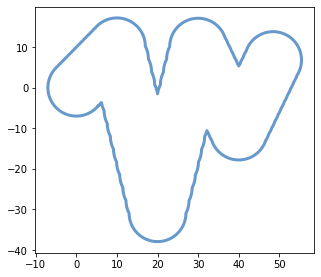

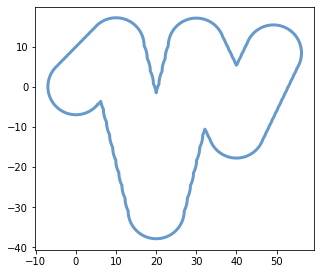

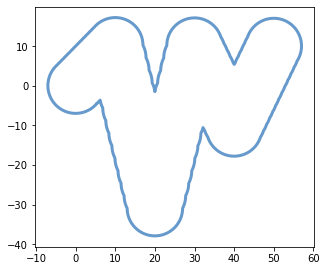

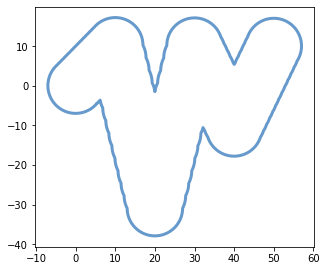

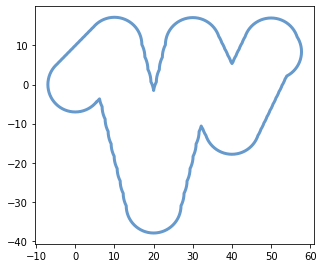

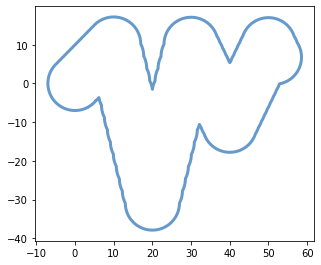

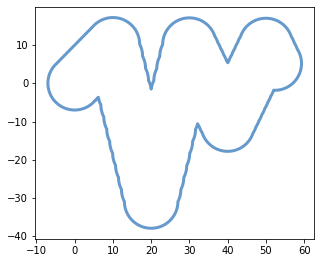

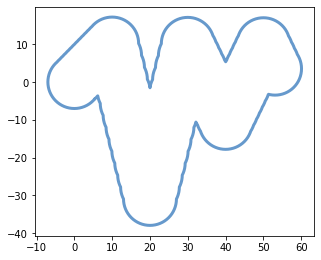

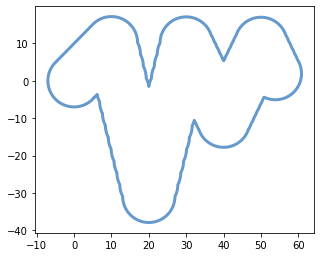

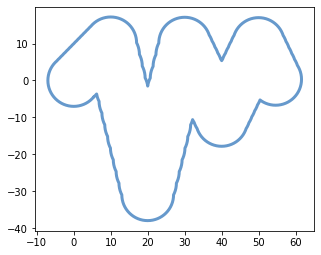

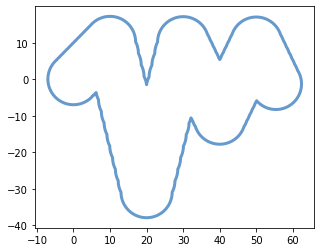

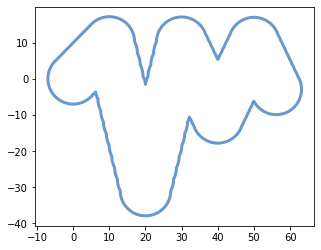

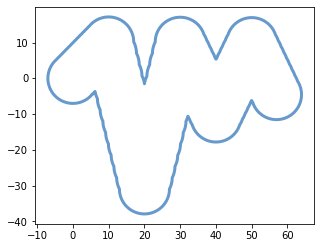

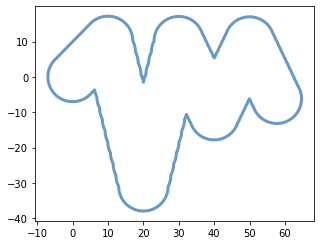

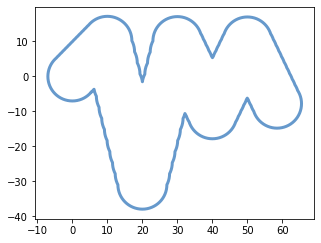

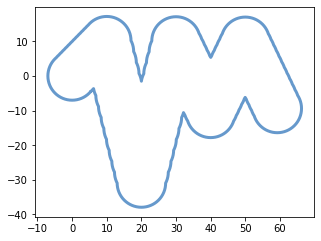

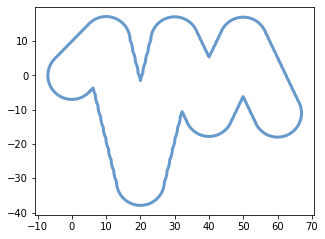

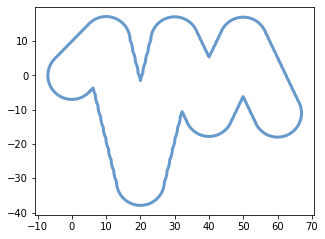

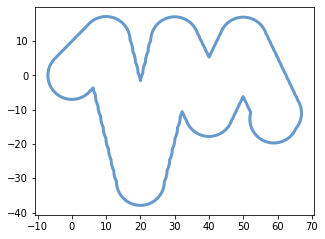

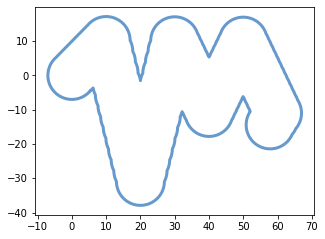

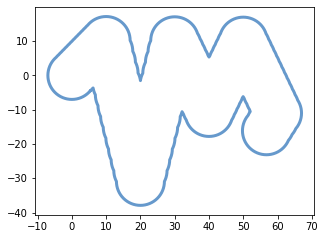

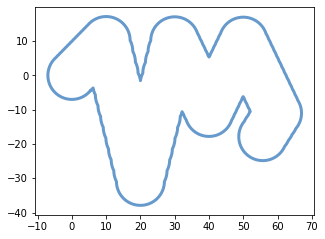

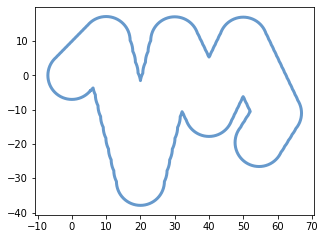

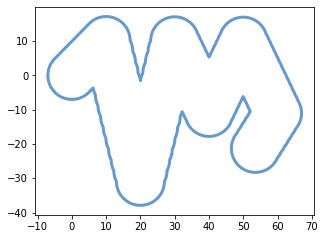

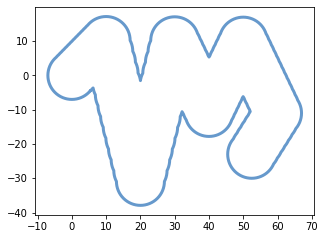

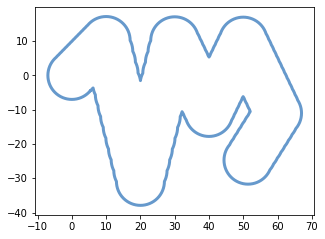

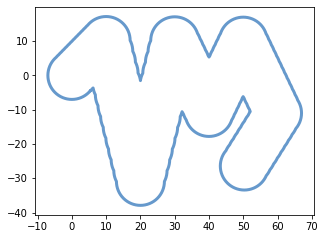

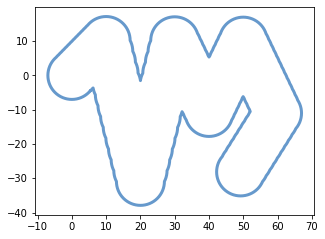

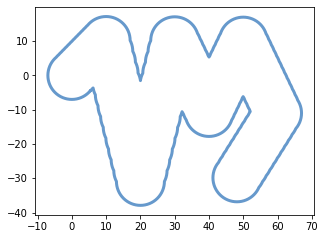

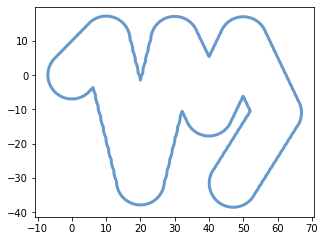

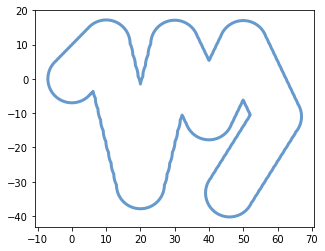

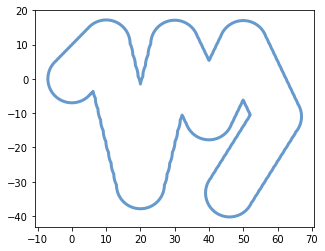

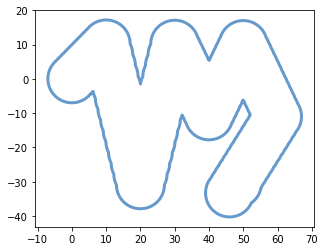

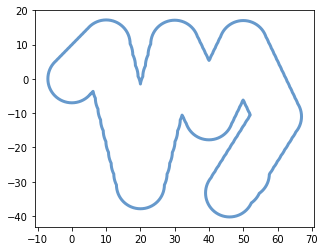

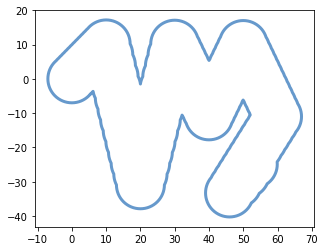

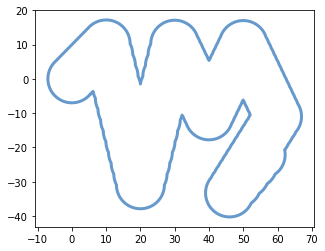

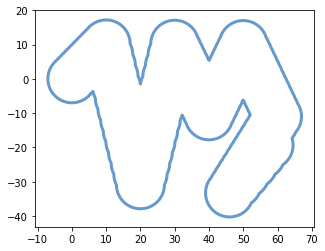

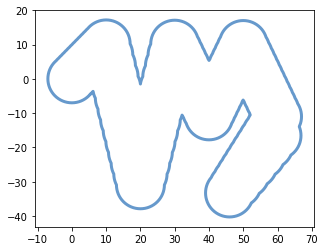

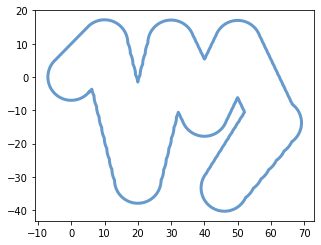

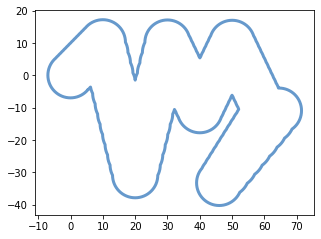

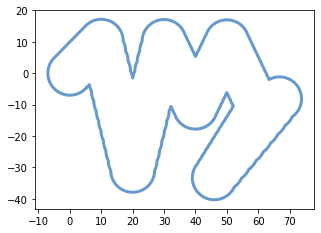

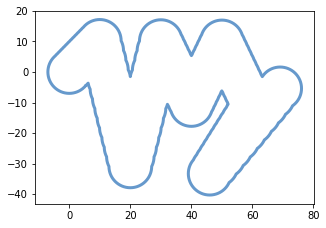

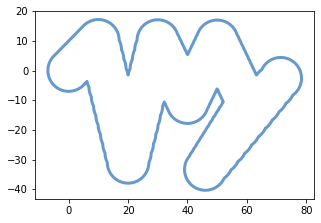

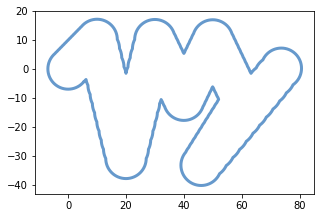

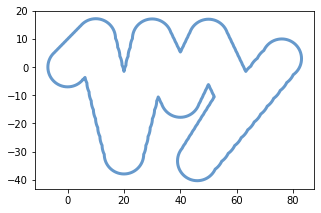

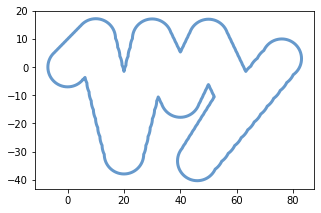

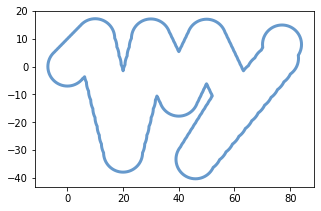

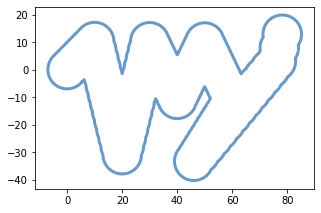

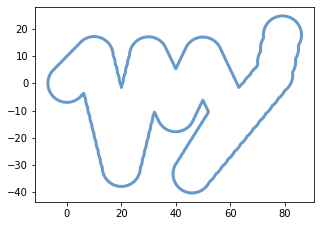

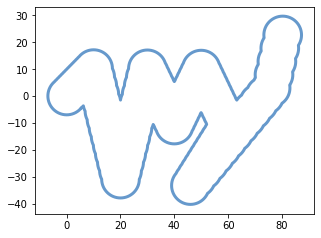

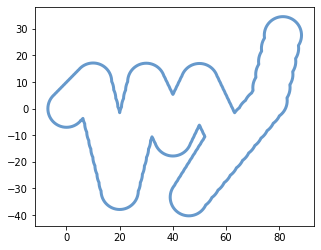

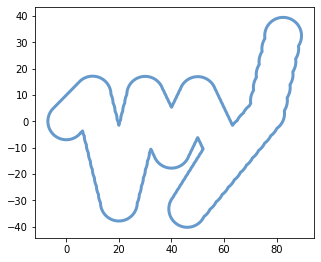

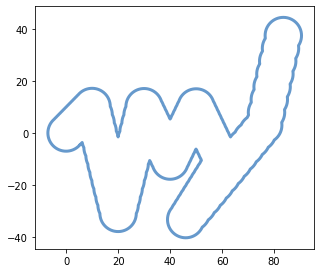

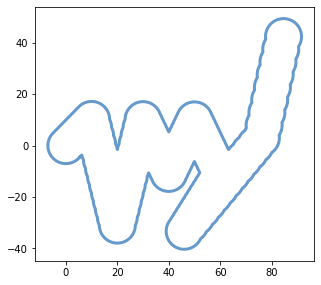

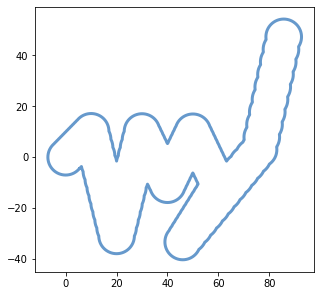

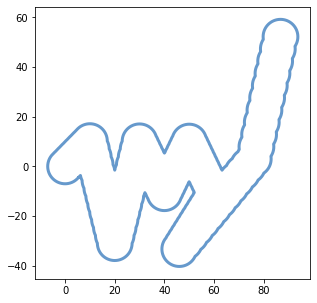

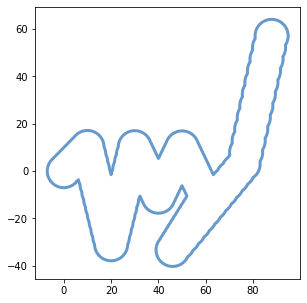

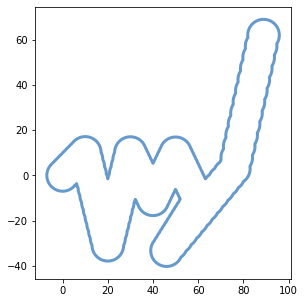

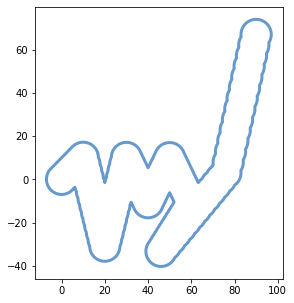

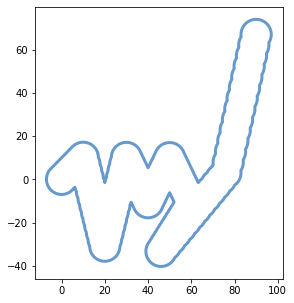

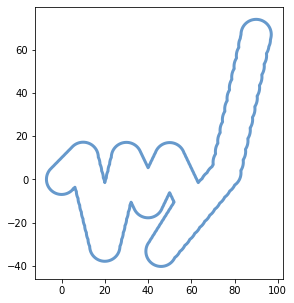

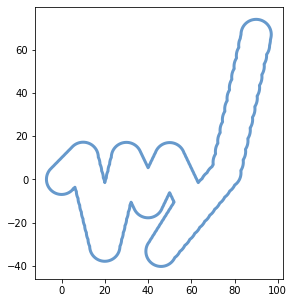

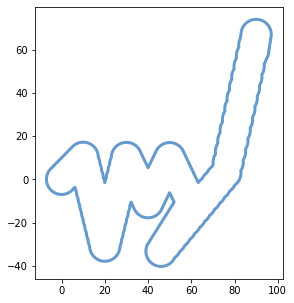

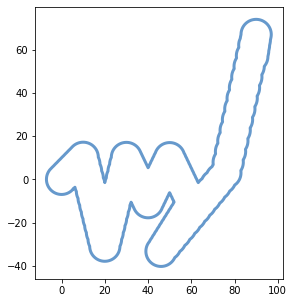

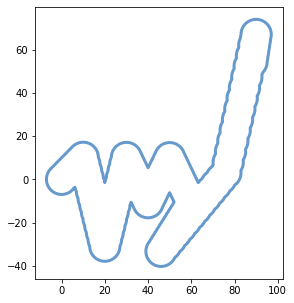

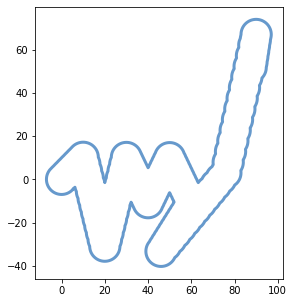

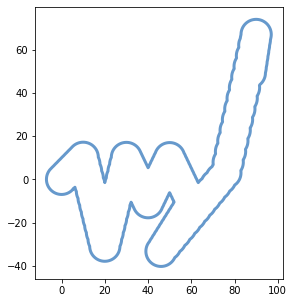

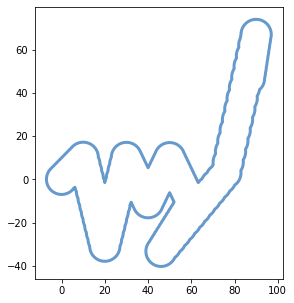

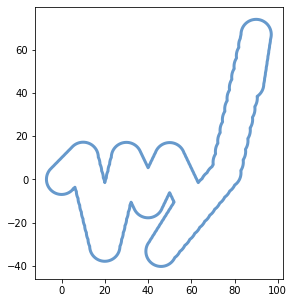

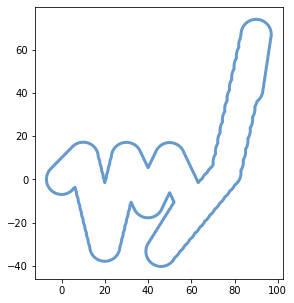

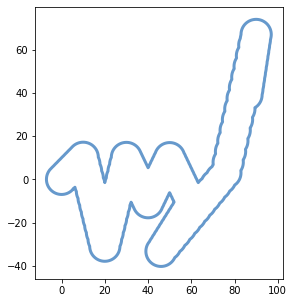

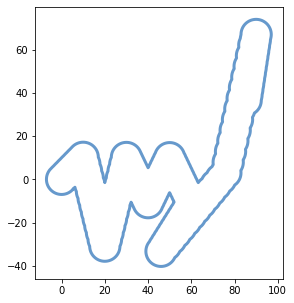

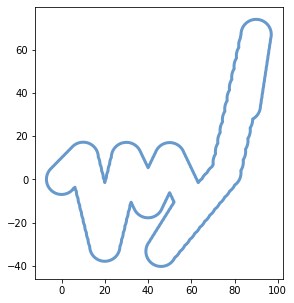

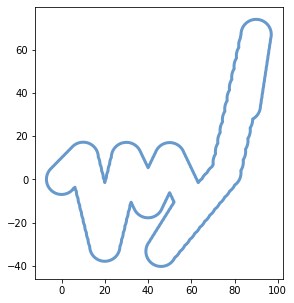

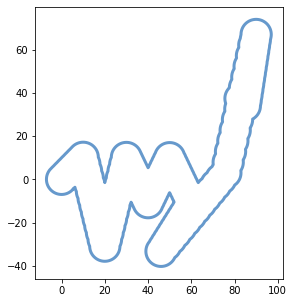

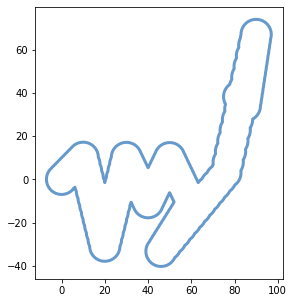

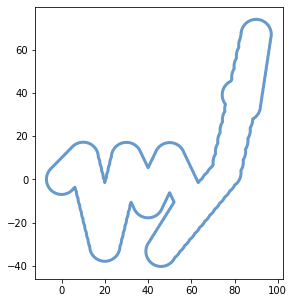

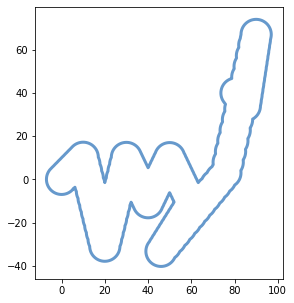

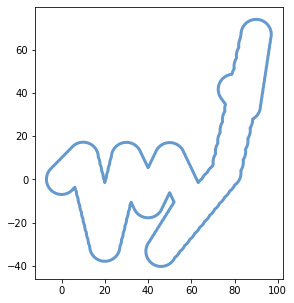

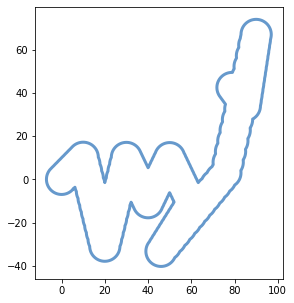

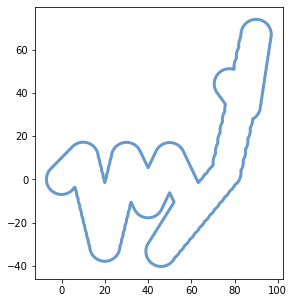

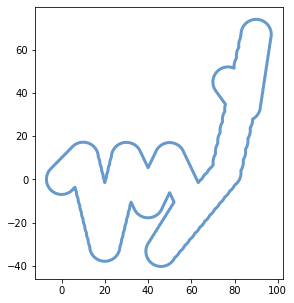

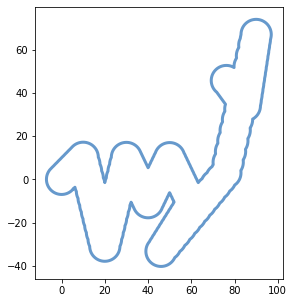

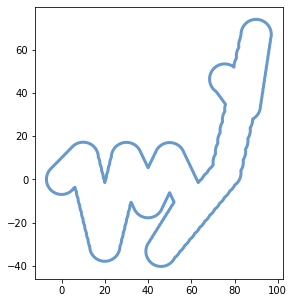

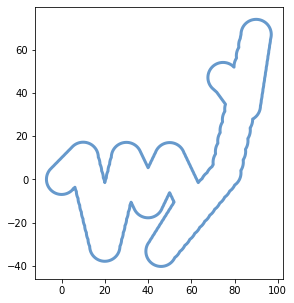

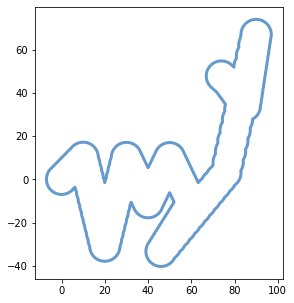

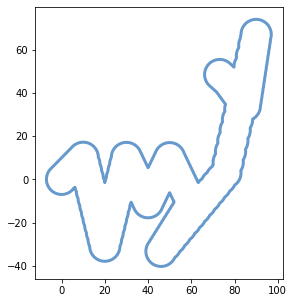

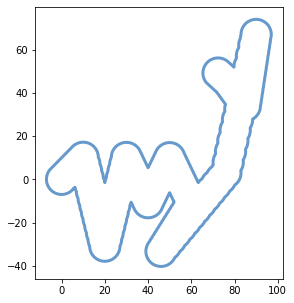

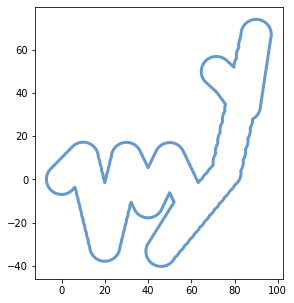

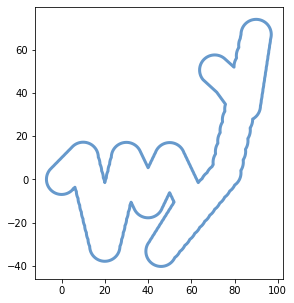

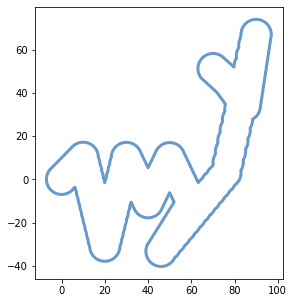

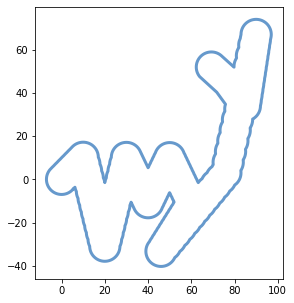

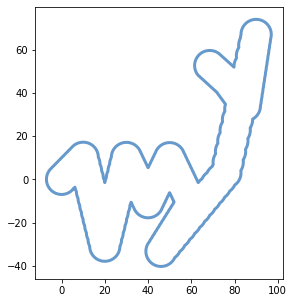

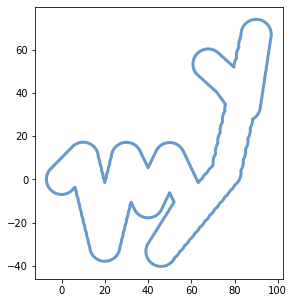

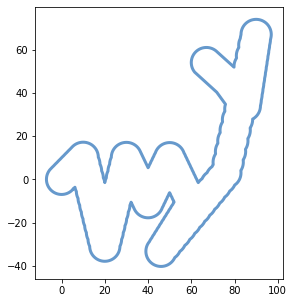

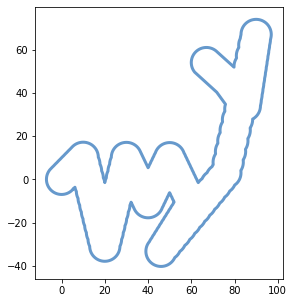

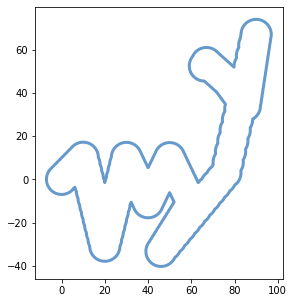

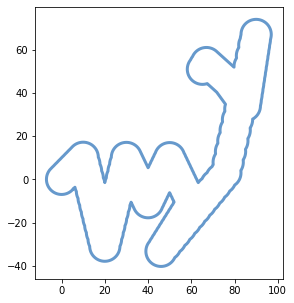

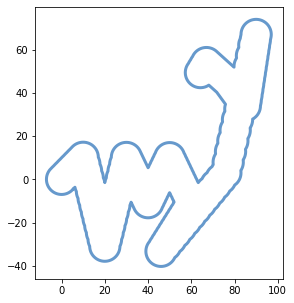

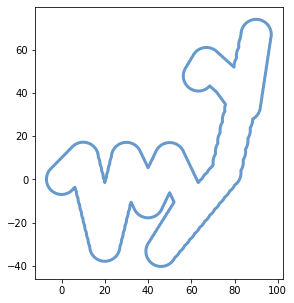

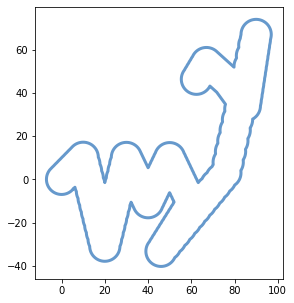

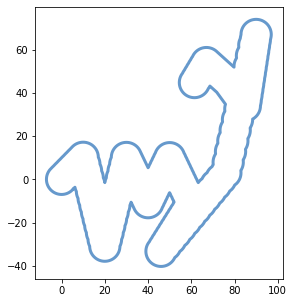

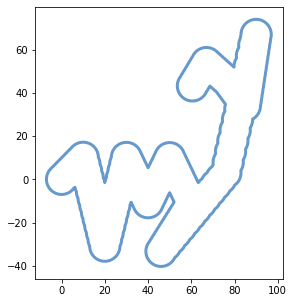

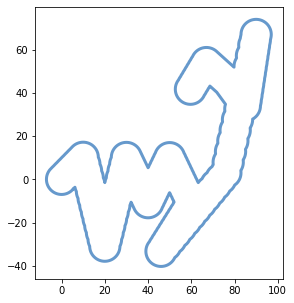

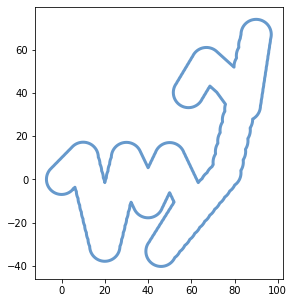

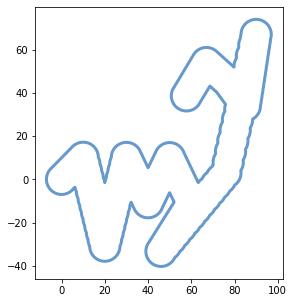

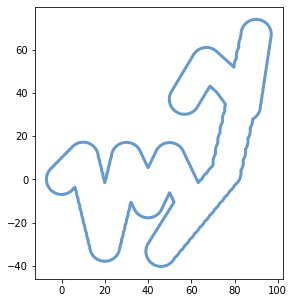

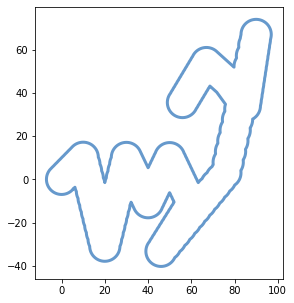

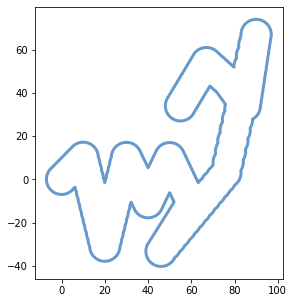

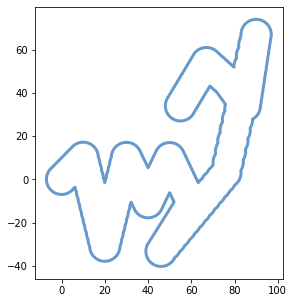

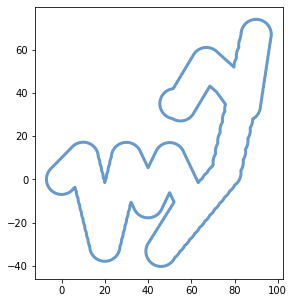

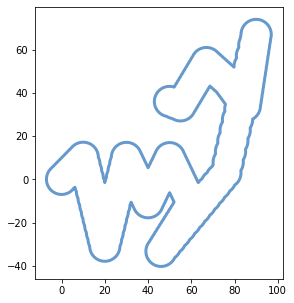

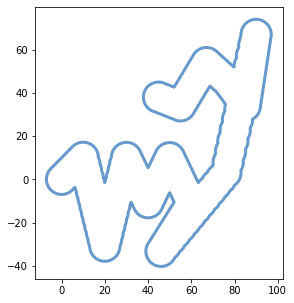

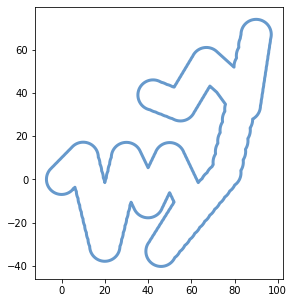

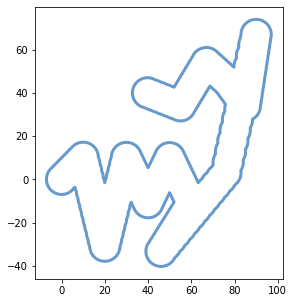

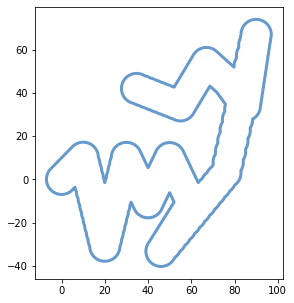

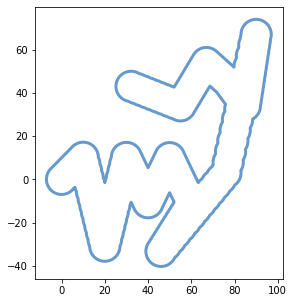

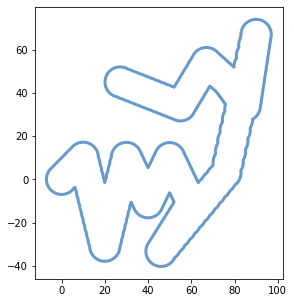

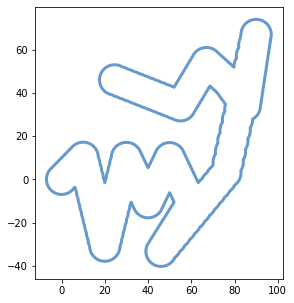

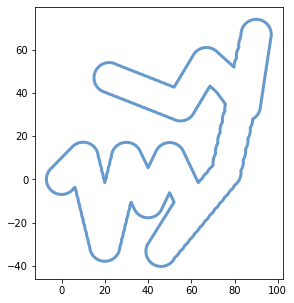

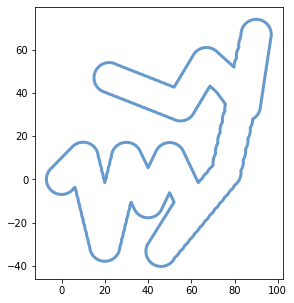

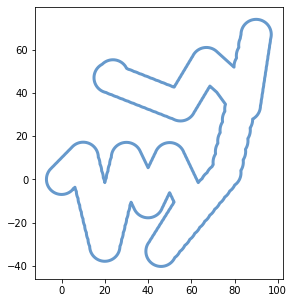

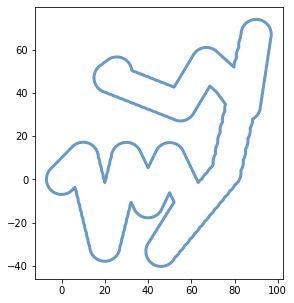

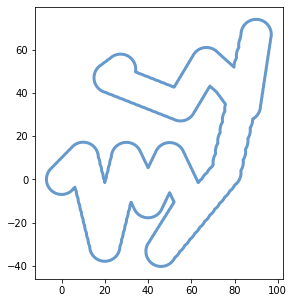

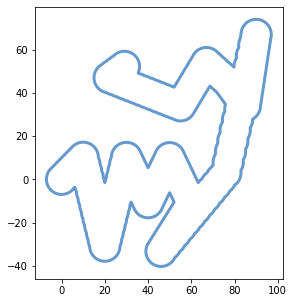

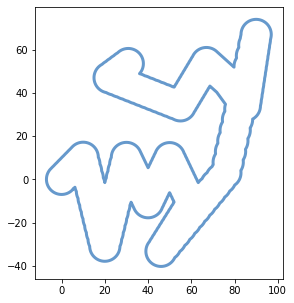

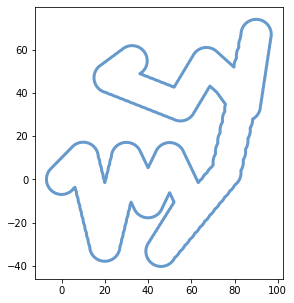

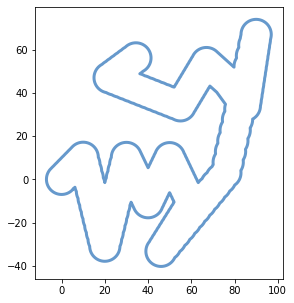

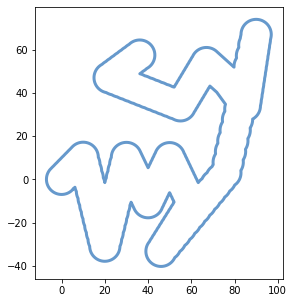

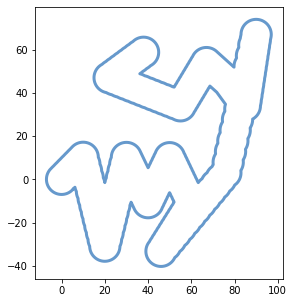

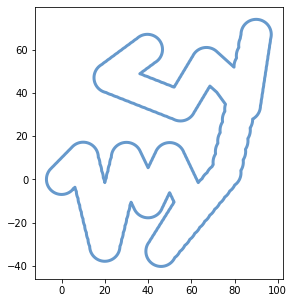

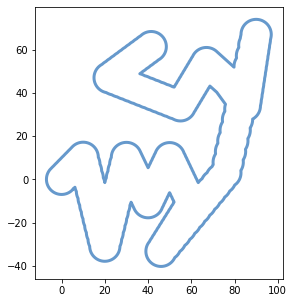

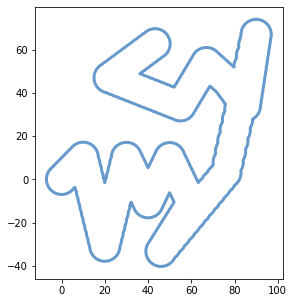

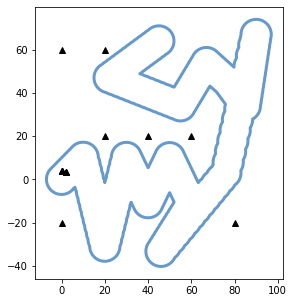

210 210
16 16
[0.0, 4.0] True
[0.069809625749134, 3.99939078062556] True
[0.13959798681000402, 3.99756330807638] True
[0.209343824971775, 3.9945181390182998] True
[0.27902589497650104, 3.9902562010393] True
[0.348622970990633, 3.9847787923669795] True
[0.41811385307061405, 3.97808758147309] True
[2.0, 3.46410161513776] True
[2.06015229964022, 3.4286692028084507] True
[2.11967705693282, 3.3921923846257003] True
[0.0, -20.0] False
[0.0, 60.0] False
[80.0, -20.0] False
[20.0, 60.0] False
[20.0, 20.0] False
[40.0, 20.0] False
[60.0, 20.0] False
<class 'pandas.core.frame.DataFrame'>


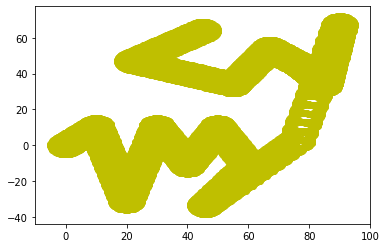

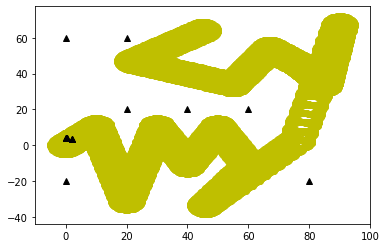

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfpx = pd.read_csv("//content//dfpx.csv")
x = dfpx['x']
y = dfpx['y']

plt.plot(x, y, 'o')
plt.show()
# plt.plot(x,y,'y')
def intermediates(p1, p2, nb_points=8):
    """"Return a list of nb_points equally spaced points
    between p1 and p2"""
    # If we have 8 intermediate points, we have 8+1=9 spaces
    # between p1 and p2
    x_spacing = (p2[0] - p1[0]) / (nb_points + 1)
    # y_spacing = (p2[1] - p1[1]) / (nb_points + 1)

    return [[p1[0] + i * x_spacing]
            for i in range(1, nb_points + 1)]


import numpy as np

newx = []
newy = []


def betweenpoints(x, y, p1, p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    xiter = intermediates([x1], [x2], 12)
    xitr = list(xiter)
    yiter = intermediates([y1], [y2], 12)
    yitr = list(yiter)
    newx.extend([[x1]])
    newx.extend(xitr)
    newx.extend([[x2]])
    newy.extend([[y1]])
    newy.extend(yitr)
    newy.extend([[y2]])

n = (len(x) - 1)
for i in np.arange(0, n, 1):
    betweenpoints(x, y, i, i + 1)

print("len", len(newx), len(newy))
print("len", len(x), len(y))
plt.plot(newx, newy, 'o')
plt.show()

for i in range(1, 1000):  # range  may needs to change for converging into fit
    p = np.polyfit(x, y, i)  # coefficient&intercepts
    # print("coeffient & intercepts for degree is p ",i, p)
    yfit = np.polyval(p, x)
    # print("yfit",i,yfit)
    yresid = y - yfit
    SSresid = np.sum(yresid ** 2)
    SStotal = len(y) * np.var(y)
    rsq = 1 - SSresid / SStotal
    print("rsq", i, rsq)

    if (
            rsq > .85):  # not come 1 0r .99 exactly everytime so greater than some rsq value which can ALSO CAN BE ELLIGIBLE
        degree = p
        print(p)

    else:
        continue
    break
yp = np.polyval(degree, x)
# print("fit value for making curve is yp", yp)
# print("given value for making curve is xp", x)
plt.plot(x, yp, 'ro')
n = (len(x) - 1)

from shapely.geometry import Point, Polygon
from shapely import geometry

def connectpoints(x, y, p1, p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1, x2], [y1, y2], 'g--')


for i in np.arange(0, n, 1):
    connectpoints(x, yp, i, i + 1)  # plt.plot(x,np.polyval(p,x),'k--')

plt.plot(x, y, 'yo')
plt.show()

print(len(newx), len(newy))
print(len(x), len(y))
n = (len(x))

import shapely.geometry as sg
import shapely.ops as so

x0 = np.asarray(newx[0])
y0 = np.asarray(newy[0])
x1 = np.asarray(newx[1])
y1 = np.asarray(newy[1])

point_1 = geometry.Point(x0, y0)
point_2 = geometry.Point(x1, y1)
    # create your circle buffer from one of the points
distance = 6
circle_buffer_1 = point_1.buffer(distance)
circle_buffer_2 = point_2.buffer(distance)
circle_buffer_1.union(circle_buffer_2)
pts1 = list(circle_buffer_1.exterior.coords)
poly1 = Polygon(pts1)
pts2 = list(circle_buffer_2.exterior.coords)
poly2 = Polygon(pts2)
POLY = poly1.union(poly2)
def union_buffer1(x, y, p1):
            global POLY
            x1 = x[p1]
            y1 = y[p1]
            x1 = np.asarray(x1)
            y1 = np.asarray(y1)
            # print(type(x))
            point_1 = geometry.Point(x1, y1)
            # create your circle buffer from one of the points
            distance = 7
            circle_buffer_1 = point_1.buffer(distance)

            pts1 = list(circle_buffer_1.exterior.coords)
            poly1 = Polygon(pts1)
            POLY = POLY.union(poly1)

#PLOTTING WILL TAKE LONG TIME...IT WILL RUN TILL THE COMPLETE POLYGON WILL BE CREATED
#AFTER FINISHING ONLY FURTHER BELOW CODE WILL BE RUN WHICH CHECK POINT INSIDE POLYGON OR NOT
#IF WANT TO SKIP COMMENT FROM BLUE TO PLOT SHOW()
            BLUE = '#6699cc'
            GRAY = '#999999'

            fig, ax = plt.subplots(figsize=(5, 5))
            x, y = POLY.union(poly1).exterior.xy  # find all the x and y points in the shape
            ax.plot(x, y, color=BLUE, linewidth=3, solid_capstyle='round')
            ax.set_aspect('equal')  # make the axes equal so the shape isn't distorted
            #plt.show()
            #plt.pause(0.5)
            #plt.savefig('fig1.pdf')
#plt.show()
n = len(newx)
for i in np.arange(0, n, 1):
    union_buffer1(newx, newy, i)

chk = pd.read_csv("//content//pointinpoly (1).csv")
X = chk['x']
Y = chk['y']
XY = np.hstack((X[:, np.newaxis], Y[:, np.newaxis]))
newp = XY  # ORIGINAL CHECKING POINTS
for point in newp:
    ppoint = Point(point)
    if ppoint.within(POLY):
        #print('point  is within the distance buffer of point 1 = ', point)
        print('TRUE ', point)
    else:
        print("False",point)
#plt.plot(x111, y111, 'yo')
plt.plot(newp[:, 0], newp[:, 1], '^k')
plt.show()
#plt.pause(0.05)
#plt.savefig('fig2.pdf')

######################################################## USING CIRCLE BUFFER ONLY
#################################################### FOR CROSS CHECK
############################################## FOR PLOTTING ONLY
print(len(newx), len(newy))
print(len(x), len(y))
n = (len(x))
#print(type(newx[0]))
df = pd.DataFrame(data={"Bx": newx, "By": newy})
df.to_csv("//content//BUFFER1.csv", sep=',', index=False)

dfBx = pd.read_csv("//content//BUFFER1.csv")
x11 = dfBx['Bx']
y11 = dfBx['By']
#print(type(y11[0]))
from shapely.geometry import Point, Polygon
from shapely import geometry

# create your points

chk = pd.read_csv("//content//pointinpoly (1).csv")
X = chk['x']  # print(x,y)
Y = chk['y']
XY = np.hstack((X[:, np.newaxis], Y[:, np.newaxis]))
newp = XY  # ORIGINAL CHECKING POINTS
TRACED_PT = []
for point in newp:
    # print(point)
    allpts = []

    def create_points(x, y, p1):
        x = x[p1]
        y = y[p1]
        #print(type(x))
        x = np.asarray(x)
        y = np.asarray(y)
        #print(type(y))
        #print(x,y)
        point_1 = geometry.Point(x, y)
        # create your circle buffer from one of the points
        distance = 5
        circle_buffer = point_1.buffer(distance)
        pts = list(circle_buffer.exterior.coords)
        poly = Polygon(pts)

        allpts.extend(pts)

        # CHECK WHETHER EACH POINT INSIDE OR NOT
        ppoint = Point(point)  # print(point.within(circle_buffer))
        if ppoint.within(circle_buffer):
            # print('point  is within the distance buffer of point 1 = ', point)
            pointTR = list(point)
            TRACED_PT.extend([pointTR])

    n = (len(newx))
    for i in np.arange(0, n, 1):
        create_points(newx, newy, i)

import itertools

num = TRACED_PT
new_num = list(num for num, _ in itertools.groupby(num))
#print("New List", new_num)

for point in newp:
    point = list(point)

    if point in new_num:
        print(point, "True")
    else:
        print(point, "False")

ptsdf = pd.DataFrame(allpts)
print(type(ptsdf))

ptsdf.columns = ['ptsx', 'ptsy']
ptsdf.to_csv("//content//aLL_BUFFER.csv", sep=',', index=False)

ptsdfBx = pd.read_csv("//content//aLL_BUFFER.csv")
x111 = ptsdfBx['ptsx']
y111 = ptsdfBx['ptsy']
plt.plot(x111, y111, 'yo')
plt.show()

plt.plot(x111, y111, 'yo')
plt.plot(newp[:, 0], newp[:, 1], '^k')
plt.show()
